In [49]:
import rdkit
from rdkit import RDLogger 

import pandas as pd

gdsc = pd.read_csv('../data/raw_dat/CCL_dataset/gdsc1_raw.csv',index_col=0)
# gdsc.dropna(inplace=True)
#查看all_drug二分类的label
q = 2
# gdsc['label'] = pd.qcut(gdsc['AUC'],q,labels = range(q-1,-1,-1),duplicates="drop") #反向，否则range(q)即可
gdsc['label'] = 0
gdsc.loc[gdsc.AUC<0.55,'label'] = 1
print(gdsc['label'].value_counts())

gdsc
# gdsc.to_csv("../data/raw_dat/CCL_dataset/gdsc1_rebalance.csv")
# a=gdsc[['Depmap_id', 'Drug_smile', 'Drug_name','label']]
# a

0    228780
1     24110
Name: label, dtype: int64


In [51]:
import math
import pandas as pd
import numpy as np

drug_list = a.Drug_name.drop_duplicates().values
all_drug = pd.DataFrame()
# drug = "5-Fluorouracil"
for drug in drug_list:
    # print(drug)
    drug_data = a.loc[a.Drug_name == drug]
    drug_data_0 = drug_data.loc[drug_data.label == 0]
    drug_data_1 = drug_data.loc[drug_data.label == 1]
    ratio = drug_data_1.shape[0]/drug_data_0.shape[0]
    if ratio > 1 : 
        ratio = math.floor(ratio)
        drug_data_0 = pd.DataFrame(np.repeat(drug_data_0.values,ratio,axis=0),columns=drug_data.columns)
    elif ratio == 0:
        drug_data_0 = drug_data_0
    else:
        ratio = math.floor(1/ratio)
        drug_data_1 = pd.DataFrame(np.repeat(drug_data_1.values,ratio,axis=0),columns=drug_data.columns)
    drug_data = pd.concat([drug_data_0,drug_data_1])
    # drug_data.label.value_counts()
    all_drug = pd.concat([all_drug,drug_data])
all_drug.groupby('Drug_name')['label'].value_counts()
all_drug

,Depmap_id,Drug_smile,Drug_name,IC50,AUC,Target,cid,label
1,ACH-000231,CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C...,Tanespimycin,-4.863947,0.66878,HSP90,6505803.0,0
42,ACH-000114,CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C...,Tanespimycin,-6.865748,0.605346,HSP90,6505803.0,0
57,ACH-000144,CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C...,Tanespimycin,8.21666,0.97771,HSP90,6505803.0,0
206,ACH-000616,CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C...,Tanespimycin,-1.017616,0.80528,HSP90,6505803.0,0
273,ACH-000558,CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C...,Tanespimycin,-4.917188,0.700115,HSP90,6505803.0,0
...,...,...,...,...,...,...,...,...
625,ACH-000358,C1CCC(C1)C2=CC(=NN2)NC3=NC(=NC=C3)NC4=CC=C(C=C...,CD532,-3.055931,0.532827,AURKA,77232197.0,1
626,ACH-000358,C1CCC(C1)C2=CC(=NN2)NC3=NC(=NC=C3)NC4=CC=C(C=C...,CD532,-3.055931,0.532827,AURKA,77232197.0,1
627,ACH-000358,C1CCC(C1)C2=CC(=NN2)NC3=NC(=NC=C3)NC4=CC=C(C=C...,CD532,-3.055931,0.532827,AURKA,77232197.0,1
628,ACH-000358,C1CCC(C1)C2=CC(=NN2)NC3=NC(=NC=C3)NC4=CC=C(C=C...,CD532,-3.055931,0.532827,AURKA,77232197.0,1


In [53]:
all_drug.groupby('Drug_name')['label'].value_counts()
all_drug.to_csv("../data/raw_dat/CCL_dataset/gdsc1_rebalance.csv")

: 

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold

ccle_labeled_feature_df = all_drug
ccle_labels = ccle_labeled_feature_df['label'].astype('int')
ccle_labels
s_kfold = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
for train_index, test_index in s_kfold.split(ccle_labeled_feature_df.values, ccle_labels.values):
        train_labeled_ccle_df, test_labeled_ccle_df = ccle_labeled_feature_df.values[train_index], \
                                                      ccle_labeled_feature_df.values[test_index]
        print(train_labeled_ccle_df)

[['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ...
 ['CD532' 1]
 ['CD532' 1]
 ['CD532' 1]]
[['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ...
 ['CD532' 1]
 ['CD532' 1]
 ['CD532' 1]]
[['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ...
 ['CD532' 1]
 ['CD532' 1]
 ['CD532' 1]]
[['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ...
 ['CD532' 1]
 ['CD532' 1]
 ['CD532' 1]]
[['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ['Tanespimycin' 0]
 ...
 ['CD532' 1]
 ['CD532' 1]
 ['CD532' 1]]


In [3]:
b = pd.DataFrame(a.groupby('Drug_name')['ccle_labels'].value_counts())
b = pd.DataFrame(a.groupby('Drug_name')['ccle_labels'].mean())

# tongji = pd.read_csv('/home/wuys/pdr2/results/all_drug/tongji_table.csv',index_col=0)
# b.loc[tongji.Drug]
# tongji
b

,ccle_labels
Drug_name,
5-Fluorouracil,0.084388
A-443654,0.070632
A-770041,0.062500
A-83-01,0.000000
ACY-1215,0.151989
...,...
ZM447439,0.002309
ZSTK474,0.142369
Zibotentan,0.000000


In [5]:
c = b.sort_values(by=['ccle_labels'],ascending=[True])
# (c > 0.5).value_counts()
c[1:50]

,ccle_labels
Drug_name,
BMS-509744,0.0
Selisistat,0.0
Seliciclib,0.0
NU7441,0.0
FTI-277,0.0
Salubrinal,0.0
Bicalutamide,0.0
SU11274,0.0
Bryostatin 1,0.0


In [13]:
tcga = pd.read_csv('../data/tcga/PDR_data/tcga706_single_drug_response_type_df.csv',index_col=0)
tcga.drop_duplicates()

,bcr_patient_barcode,pharmaceutical_therapy_drug_name,pharmaceutical_tx_started_days_to,treatment_best_response,tcga_project,drug_name,smiles,cid
0,TCGA-BJ-A2N7,Levothyroxine,16,Stable Disease,THCA,Levothyroxine,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,5819
10,TCGA-FY-A3W9,Levothyroxine,214,Complete Response,THCA,Levothyroxine,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,5819
28,TCGA-CE-A481,Doxorubicin,172,Complete Response,THCA,Doxorubicin,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,31703
29,TCGA-CE-A482,Doxorubicin,142,Complete Response,THCA,Doxorubicin,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,31703
49,TCGA-3B-A9I0,Doxorubicin,580,Stable Disease,SARC,Doxorubicin,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,31703
...,...,...,...,...,...,...,...,...
6607,TCGA-EE-A2M5,PNU-159548,559,Clinical Progressive Disease,SKCM,PNU-159548,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,216232
6608,TCGA-EE-A3AD,Vemurafenib,632,Clinical Progressive Disease,SKCM,Vemurafenib,CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C...,42611257
6609,TCGA-EE-A3AH,PI-88,3977,Clinical Progressive Disease,SKCM,PI-88,C(C1C(C(C(C(O1)OC2C(C(OC(C2OS(=O)(=O)O)OC3C(C(...,46233428
6611,TCGA-FR-A8YC,Doxorubicin,1020,Clinical Progressive Disease,SKCM,Doxorubicin,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,31703


## 生成regresssion数据

In [5]:
import pandas as pd

gdsc = pd.read_csv('../data/raw_dat/CCL_dataset/gdsc1_raw.csv',index_col=0)
gdsc['label'] = gdsc['AUC']
gdsc.to_csv('../data/raw_dat/CCL_dataset/gdsc1_raw_regression.csv')

gdsc = pd.read_csv('../data/raw_dat/CCL_dataset/gdsc1_rebalance.csv',index_col=0)
gdsc['label'] = gdsc['AUC']
gdsc.to_csv('../data/raw_dat/CCL_dataset/gdsc1_rebalance_regression.csv')

In [124]:
smiles = tcga['smiles'].drop_duplicates().values
RDLogger.DisableLog('rdApp.*')
# smiles[10]
for i in range(1,smiles.shape[0]):     
    mol = rdkit.Chem.MolFromSmiles(smiles[i])
    if not mol:
        print(i)
        print(gdsc.iloc[i])
        a = gdsc.iloc[i]

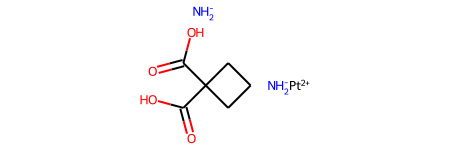

In [59]:
drug = '[H][N]([H])([H])[Pt]1(OC(=O)C2(CCC2)C(=O)O1)[N]([H])([H])[H]'
drug = '[H][N]([H])([H])[Pt](Cl)(Cl)[N]([H])([H])[H]'

drug = 'C1CC(C1)(C(=O)O)C(=O)O.[NH2-].[NH2-].[Pt+2]'

mol = rdkit.Chem.MolFromSmiles(drug)
mol


In [63]:
drug_smiles_info = pd.read_csv(data_config.tcga_drug_smiles_info_file, index_col=0,encoding='ISO-8859-1')#[['drug_name','SMILES_Final']]
drug_smiles_info.drop_duplicates(inplace=True)
# drug_smiles_info.loc[drug_smiles_info['drug_name'] == 'Cisplatin','SMILES_Final'] = 'N.N.Cl[Pt]Cl'
# drug_smiles_info.loc[drug_smiles_info['drug_name'] == 'Carboplatin','SMILES_Final'] = 'C1CC(C1)(C(=O)O)C(=O)O.[NH2-].[NH2-].[Pt+2]'
# drug_smiles_info.loc[drug_smiles_info['drug_name'] == 'Ifosfamid','SMILES_Final'] = 'C1CN(P(=O)(OC1)NCCCl)CCCl'
# drug_smiles_info.loc[drug_smiles_info['drug_name'] == 'SOM 230','SMILES_Final'] = 'C1C(CN2C1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C2=O)CC3=CC=CC=C3)CC4=CC=C(C=C4)OCC5=CC=CC=C5)CCCCN)CC6=CNC7=CC=CC=C76)C8=CC=CC=C8)OC(=O)NCCN'
# drug_smiles_info.loc[drug_smiles_info['drug_name'] == '5 FU','SMILES_Final'] = 'C1=C(C(=O)NC(=O)N1)F'



smiles = drug_smiles_info['SMILES_Final'].values

In [55]:
drug_smiles_info.loc[drug_smiles_info['drug_name'] == 'Cisplatin','SMILES_Final']

index
1    [H][N]([H])([H])[Pt](Cl)(Cl)[N]([H])([H])[H]
Name: SMILES_Final, dtype: object

In [61]:
for i in range(0,smiles.shape[0]):     
    mol = rdkit.Chem.MolFromSmiles(smiles[i])
    if not mol:
        print(i)
        print(drug_smiles_info.iloc[i])
        a = drug_smiles_info.iloc[i]

11
drug_name       Avastin
SMILES_Final         -1
Name: 28, dtype: object
20
drug_name                                                 Naxavar
SMILES_Final    ['CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=...
Name: 163, dtype: object
28
drug_name                           5 FU
SMILES_Final    ['C1=C(C(=O)NC(=O)N1)F']
Name: 173, dtype: object
29
drug_name                                             Oxaliplatin
SMILES_Final    [H][N]1([H])[C@@H]2CCCC[C@H]2[N]([H])([H])[Pt]...
Name: 176, dtype: object
36
drug_name              CISPLATINUM
SMILES_Final    ['N.N.Cl[Pt+2]Cl']
Name: 204, dtype: object
44
drug_name       Poly E
SMILES_Final        -1
Name: 218, dtype: object
48
drug_name       Bevacizumab
SMILES_Final             -1
Name: 228, dtype: object
53
drug_name       R1507
SMILES_Final       -1
Name: 236, dtype: object
61
drug_name                                    Tivantinib (ARQ-197)
SMILES_Final    ['C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)...
Name: 251, dtype: object
62
drug

In [65]:
from data_preprocessing import get_tcga_first_treatment_df, get_tcga_response_df
single_drug,response_type_df = get_tcga_first_treatment_df("pancancer") #第一次用药信息,第一次用药影像学响应信息
first_response_df, pancancer_response_df = get_tcga_response_df("pancancer") #第一次PFS，所有PFS

# first_response_df 需要和 single_drug 对应一下得到PFS对应病人的第一次用药信息
first_response_df_with_drug = first_response_df.merge(single_drug)



THCA: nationwidechildrens.org_clinical_drug_thca.txt
ACC: nationwidechildrens.org_clinical_drug_acc.txt
LUSC: nationwidechildrens.org_clinical_drug_lusc.txt
CESC: nationwidechildrens.org_clinical_drug_cesc.txt
OV: nationwidechildrens.org_clinical_drug_ov.txt
KICH: nationwidechildrens.org_clinical_drug_kich.txt
SARC: nationwidechildrens.org_clinical_drug_sarc.txt
PCPG: nationwidechildrens.org_clinical_drug_pcpg.txt
LGG: nationwidechildrens.org_clinical_drug_lgg.txt
UCEC: nationwidechildrens.org_clinical_drug_ucec.txt
CHOL: nationwidechildrens.org_clinical_drug_chol.txt
MESO: nationwidechildrens.org_clinical_drug_meso.txt
BLCA: nationwidechildrens.org_clinical_drug_blca.txt
KIRP: nationwidechildrens.org_clinical_drug_kirp.txt
COAD: nationwidechildrens.org_clinical_drug_coad.txt
UVM: nationwidechildrens.org_clinical_drug_uvm.txt
READ: nationwidechildrens.org_clinical_drug_read.txt
PRAD: nationwidechildrens.org_clinical_drug_prad.txt
KIRC: nationwidechildrens.org_clinical_drug_kirc.txt
ESC

In [4]:
from pubchempy import get_compounds

get_compounds('Oxaliplatin','name')[0].cid
# drug_name_list[4]

Compound(9887053)

In [118]:
from pubchempy import get_compounds, Compound

drug_name_list = first_response_df_with_drug['drug_name'].drop_duplicates().values
temp = []
# To test: name -> canonical_smiles
for i in range(0,drug_name_list.shape[0]):
    # print(i)
    try:
        a = get_compounds(drug_name_list[i],'name')[0].canonical_smiles
        temp.append([drug_name_list[i],a])
    except Exception as e:
        print(e)
        print(i,drug_name_list[i])
        pass
# first_response_df_with_drug
drug_smiles_pubchem = pd.DataFrame(temp,columns=['drug_name','smiles'])

In [5]:
# To test: name -> cid
import pandas as pd
from pubchempy import get_compounds
first_response_df_with_drug = pd.read_csv('../data/tcga/PDR_data/tcga1078_single_drug_response_df.csv',index_col=0)
drug_name_list = first_response_df_with_drug['drug_name'].drop_duplicates().values
temp = []
for i in range(0,drug_name_list.shape[0]):
    print(i)
    try:
        a = get_compounds(drug_name_list[i],'name')[0].cid
        temp.append([drug_name_list[i],a])
    except Exception as e:
        print(e)
        print(i,drug_name_list[i])
        pass
# first_response_df_with_drug
drug_smiles_pubchem = pd.DataFrame(temp,columns=['drug_name','cid'])
drug_smiles_pubchem

,drug_name,smiles
0,Liothyronine,5920
1,Levothyroxine,5819
2,Capecitabine,60953
3,Cisplatin,5702198
4,Sorafenib,216239
...,...,...
65,Vinorelbine,5311497
66,Suramin,5361
67,Vincristine,5978
68,Dexamethasone,5743


In [7]:
drug_smiles_pubchem = pd.DataFrame(temp,columns=['drug_name','cid'])
drug_smiles_pubchem.to_csv("drug_smiles_pubchem_70PFS.csv")

In [73]:
drug_mapping = pd.read_csv(data_config.tcga_drug_name_mapping_file)

response_type_df['drug_name'].isin(drug_mapping['OldName']).value_counts() #640
first_response_df_with_drug['drug_name'].isin(drug_mapping['OldName']).value_counts() #1007


True    640
Name: drug_name, dtype: int64

## 得到每个癌种的zero-shot数据

In [10]:
import pandas as pd
import numpy as np

all_response_df = pd.read_csv('../data/tcga/PDR_data/tcga698_single_drug_response_df.csv',index_col=1)
# response_type_df = pd.read_csv('../data/tcga/PDR_data/tcga667_single_drug_response_type_df.csv',index_col=1)

Tumor_type_list = [ "brca", "cesc", "coad", "gbm", "hnsc", "kirc", 
              "luad", "lusc",  "paad",  "read", "sarc", "skcm", "stad"] #"ucec",
            # "lgg","blca","ov","prad","kich","kirp","lihc", "esca","meso","ucs","acc"] #20+4
# tumor_type = [element.upper() for element in Tumor_type_list][1]

for tumor_type in [element.upper() for element in Tumor_type_list]:
    response_df = all_response_df.loc[all_response_df['tcga_project'] == tumor_type]
    response_df = response_df[['days_to_new_tumor_event_after_initial_treatment','smiles','cid']]
        
    response_df['label'] = pd.qcut(response_df['days_to_new_tumor_event_after_initial_treatment'],2,labels = range(2))
    response_df.to_csv(f"../data/preprocessed_dat/tcga_clinical_data/{tumor_type}_{response_df.shape[0]}.csv")


## 突变数据

In [3]:
import pandas as pd
import numpy as np

# all_response_df = pd.read_csv('../data/tcga/PDR_data/tcga698_single_drug_response_df.csv',index_col=1)
# response_type_df = pd.read_csv('../data/tcga/PDR_data/tcga667_single_drug_response_type_df.csv',index_col=1)

CN = pd.read_csv("../../DrugCell/2019_Xena_CNV/output/GDC_CN.csv",index_col=0)
CN = CN.T.to_csv("../data/preprocessed_dat/xena_mutation.csv")


## 2015PDX数据

In [5]:
from pubchempy import get_compounds

Meta = pd.read_csv("../../DrugCell/2015_PDX_data/output/Meta.csv",index_col=0)
drug_name_list = Meta['Treatment'].drop_duplicates().values

temp = []
for i in range(0,drug_name_list.shape[0]):
        # print(i)
        try:
            drug_id = get_compounds(drug_name_list[i],'name')[0]
            smiles,cid = drug_id.canonical_smiles , drug_id.cid
            temp.append([drug_name_list[i],smiles,cid])
        except Exception as e:
            print(e)
            print(i,drug_name_list[i])
            pass
drug_smiles_info = pd.DataFrame(temp,columns=['drug_name','smiles','cid'])
drug_smiles_info


list index out of range
8 LFA102
list index out of range
9 LJM716
list index out of range
10 LKA136
list index out of range
11 LLM871
list index out of range
15 trastuzumab
list index out of range
16 untreated
list index out of range
18 cetuximab
list index out of range
19 CKX620
list index out of range
21 LJC049
list index out of range
27 figitumumab""
list index out of range
28 gemcitabine-50mpk
list index out of range
30 binimetinib-3.5mpk
list index out of range
35 LGW813
list index out of range
36 TAS266


,drug_name,smiles,cid
0,BGJ398,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,53235510
1,BKM120,C1COCCN1C2=NC(=NC(=C2)C3=CN=C(C=C3C(F)(F)F)N)N...,16654980
2,BYL719,CC1=C(SC(=N1)NC(=O)N2CCCC2C(=O)N)C3=CC(=NC=C3)...,56649450
3,CGM097,CC(C)OC1=C(C=C2CC(=O)N(C(C2=C1)C3=CC=C(C=C3)Cl...,53240420
4,CLR457,CC1C(N(C(=O)O1)C2=NC(=NC(=C2)C3=CN=C(N=C3C(F)(...,71682837
5,HDM201,CC(C)N1C2=C(C(=O)N(C2C3=CC=C(C=C3)Cl)C4=CC(=CN...,71678098
6,INC424,C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3,25126798
7,LEE011,CN(C)C(=O)C1=CC2=CN=C(N=C2N1C3CCCC3)NC4=NC=C(C...,44631912
8,binimetinib,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...,10288191
9,paclitaxel,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,36314


In [6]:
Meta = pd.merge(Meta, drug_smiles_info,
        left_on = 'Treatment',right_on = 'drug_name')
Meta

,Model,Tumor_type,Treatment,TimeToDouble,drug_name,smiles,cid
0,X-1004,BRCA,BGJ398,26.0,BGJ398,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,53235510
1,X-1008,BRCA,BGJ398,34.6,BGJ398,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,53235510
2,X-1156,NSCLC,BGJ398,6.2,BGJ398,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,53235510
3,X-1172,NSCLC,BGJ398,9.1,BGJ398,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,53235510
4,X-1298,BRCA,BGJ398,14.9,BGJ398,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,53235510
...,...,...,...,...,...,...,...
1751,X-4644,CM,LDK378,7.9,LDK378,CC1=CC(=C(C=C1C2CCNCC2)OC(C)C)NC3=NC=C(C(=N3)N...,57379345
1752,X-4668,CM,LDK378,7.0,LDK378,CC1=CC(=C(C=C1C2CCNCC2)OC(C)C)NC3=NC=C(C(=N3)N...,57379345
1753,X-4832,CM,LDK378,4.9,LDK378,CC1=CC(=C(C=C1C2CCNCC2)OC(C)C)NC3=NC=C(C(=N3)N...,57379345
1754,X-4849,CM,LDK378,6.6,LDK378,CC1=CC(=C(C=C1C2CCNCC2)OC(C)C)NC3=NC=C(C(=N3)N...,57379345


In [7]:
# Meta = Meta[['Model','']]
Tumor_type_list = ["BRCA", "CM" ,"CRC", "NSCLC" , "PDAC"] 
# tumor_type = Tumor_type_list][1]

for tumor_type in Tumor_type_list:
    response_df = Meta.loc[Meta['Tumor_type'] == tumor_type]
    response_df = response_df[['Model','TimeToDouble','drug_name','smiles','cid']]
        
    response_df['label'] = pd.qcut(response_df['TimeToDouble'],2,labels = range(2))
    response_df.to_csv(f"../data/preprocessed_dat/pdx_data_2015/Drug_response/{tumor_type}_{response_df.shape[0]}.csv")


In [9]:
CN = pd.read_csv("../../DrugCell/2015_PDX_data/output/CN.csv",index_col=0)
CN.T.to_csv('../data/preprocessed_dat/pdx_data_2015/CN.csv')
Gex = pd.read_csv("../../DrugCell/2015_PDX_data/output/Gex.csv",index_col=0)
Gex.T.to_csv('../data/preprocessed_dat/pdx_data_2015/Gex.csv')


: 

label_data: gdsc1+2 

In [34]:
import pandas as pd
import os
import data_config
import numpy as np

In [4]:
    measurement = 'Z_SCORE'
    threshold = 0.0
    # drugs_to_keep = [drug.lower()]
    gdsc1_response = pd.read_csv(data_config.gdsc_target_file1)
    gdsc2_response = pd.read_csv(data_config.gdsc_target_file2)
    gdsc1_sensitivity_df = gdsc1_response[['COSMIC_ID', 'DRUG_NAME', measurement]]
    gdsc2_sensitivity_df = gdsc2_response[['COSMIC_ID', 'DRUG_NAME', measurement]]
    gdsc1_sensitivity_df.loc[:, 'DRUG_NAME'] = gdsc1_sensitivity_df['DRUG_NAME'].str.lower()
    gdsc2_sensitivity_df.loc[:, 'DRUG_NAME'] = gdsc2_sensitivity_df['DRUG_NAME'].str.lower()


/tmp/ipykernel_352432/1233353057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdsc1_sensitivity_df.loc[:, 'DRUG_NAME'] = gdsc1_sensitivity_df['DRUG_NAME'].str.lower()
/tmp/ipykernel_352432/1233353057.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdsc2_sensitivity_df.loc[:, 'DRUG_NAME'] = gdsc2_sensitivity_df['DRUG_NAME'].str.lower()


In [8]:
    gdsc1_target_df = gdsc1_sensitivity_df.groupby(['COSMIC_ID', 'DRUG_NAME']).mean()
    gdsc2_target_df = gdsc2_sensitivity_df.groupby(['COSMIC_ID', 'DRUG_NAME']).mean()
    gdsc1_target_df = gdsc1_target_df.loc[gdsc1_target_df.index.difference(gdsc2_target_df.index)]
    gdsc_target_df = pd.concat([gdsc1_target_df, gdsc2_target_df])
    target_df = gdsc_target_df.reset_index().pivot_table(values=measurement, index='COSMIC_ID', columns='DRUG_NAME')

In [13]:
ccle_sample_info = pd.read_csv(data_config.ccle_sample_file, index_col=4)
ccle_sample_info = ccle_sample_info.loc[ccle_sample_info.index.dropna()]
ccle_sample_info.index = ccle_sample_info.index.astype('int')
gdsc_sample_info = pd.read_csv(data_config.gdsc_sample_file, header=0, index_col=1)
gdsc_sample_info = gdsc_sample_info.loc[gdsc_sample_info.index.dropna()]
gdsc_sample_info.index = gdsc_sample_info.index.astype('int')
    # gdsc_sample_info = gdsc_sample_info.loc[gdsc_sample_info.iloc[:, 8].dropna().index]

gdsc_sample_mapping = gdsc_sample_info.merge(ccle_sample_info, left_index=True, right_index=True, how='inner')[
        ['DepMap_ID']]
gdsc_sample_mapping_dict = gdsc_sample_mapping.to_dict()['DepMap_ID']

In [18]:
a = target_df.iloc[:,0].values

Test自己的get_ccl_labeled_dataloader_generator

In [22]:
dataset = 'gdsc_raw'
measurement='AUC'
gex_features_df = pd.read_csv(data_config.gex_feature_file, index_col=0)

In [98]:
    Dataset_path = '../data/raw_dat/CCL_dataset/{}.csv'.format(dataset)
    sensitivity_df = pd.read_csv(Dataset_path,index_col=1)
    target_df = sensitivity_df

    ccle_sample_info = pd.read_csv(data_config.ccle_sample_file, index_col=0)
    ccle_sample_info = ccle_sample_info.loc[ccle_sample_info.index.dropna()] 

    keep_samples = target_df.index.isin(gex_features_df.index)

    ccle_labeled_feature_df = target_df.loc[keep_samples][["Drug_smile",measurement]]
    ccle_labeled_feature_df.dropna(inplace=True)
    ccle_labeled_feature_df = ccle_labeled_feature_df.merge(gex_features_df,left_index=True,right_index=True)

    ccle_labels = pd.qcut(ccle_labeled_feature_df[measurement],q,labels = range(q-1,-1,-1))
    ccle_labeled_feature_df[measurement] = ccle_labels

In [100]:
class CCLDataset(Dataset):
        def __init__(self, ccl_data):
            self.data = ccl_data

        def __getitem__(self, item):
            return self.data[item]

        def __len__(self):
            return len(self.data)

In [103]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from torch.utils.data import TensorDataset, DataLoader,Dataset

s_kfold = StratifiedKFold(n_splits=5, random_state=2020, shuffle=True)
for train_index, test_index in s_kfold.split(ccle_labeled_feature_df.values, ccle_labels.values):
        train_labeled_ccle_df, test_labeled_ccle_df = ccle_labeled_feature_df.values[train_index], \
                                                      ccle_labeled_feature_df.values[test_index]
        train_ccle_labels, test_ccle_labels = ccle_labels.values[train_index], ccle_labels.values[test_index]

        train_labeled_ccle_dateset = CCLDataset(
            train_labeled_ccle_df)
            
        test_labeled_ccle_df = CCLDataset(
            test_labeled_ccle_df)

        train_labeled_ccle_dataloader = DataLoader(train_labeled_ccle_dateset,
                                                   batch_size=batch_size,
                                                   shuffle=True)

        test_labeled_ccle_dataloader = DataLoader(test_labeled_ccle_df,
                                                  batch_size=batch_size,
                                                  shuffle=True)

get_tcga_ZS_dataloaders

In [ ]:
    tcga_gex_feature_df = gex_features_df.loc[gex_features_df.index.str.startswith('TCGA')]
    tcga_gex_feature_df.index = tcga_gex_feature_df.index.map(lambda x: x[:12])
    tcga_gex_feature_df = tcga_gex_feature_df.groupby(level=0).mean()
    response_df = pd.read_csv('../data/tcga/PDR_data/tcga1007_single_drug_response_df.csv',index_col=1)
    tcga_drug_gex = response_df.merge(tcga_gex_feature_df,left_index=True,right_index=True)
    a=tcga_drug_gex.loc[tcga_drug_gex['tcga_project'] == 'BRCA']
    a

In [118]:
response_df = pd.read_csv('../data/tcga/PDR_data/tcga1007_single_drug_response_df.csv',index_col=1)
response_df['tcga_project'].value_counts()



GBM     279
LGG     127
PAAD     68
HNSC     55
LIHC     44
KIRC     41
SARC     39
PRAD     39
OV       37
BRCA     34
STAD     33
CESC     31
SKCM     30
BLCA     20
LUSC     20
LUAD     19
UCEC     17
READ     14
COAD     10
KIRP      9
MESO      8
KICH      8
ESCA      7
UCS       7
ACC       5
CHOL      3
THYM      1
THCA      1
TGCT      1
Name: tcga_project, dtype: int64

In [119]:
response_type_df = pd.read_csv('../data/tcga/PDR_data/tcga640_single_drug_response_type_df.csv',index_col=1)
response_type_df['tcga_project'].value_counts()


LGG     123
CESC     63
PAAD     63
STAD     59
HNSC     57
BRCA     38
SARC     24
PRAD     23
LIHC     20
SKCM     19
COAD     16
READ     14
UCEC     13
ESCA     12
MESO     12
BLCA     11
LUAD     10
KIRC      9
GBM       9
LUSC      7
KIRP      7
UCS       7
TGCT      7
CHOL      4
THCA      4
KICH      3
ACC       3
THYM      2
OV        1
Name: tcga_project, dtype: int64

In [135]:
response_type_df.iloc[:,6]


bcr_patient_barcode
TCGA-BJ-A2N7        NC(Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(=O)O
TCGA-FY-A3W9        NC(Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(=O)O
TCGA-CE-A481    COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...
TCGA-CE-A482    COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...
TCGA-3B-A9I0    COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...
                                      ...                        
TCGA-AC-A62V                                                   -1
TCGA-HU-8238                                O=C(NO)c1ccc(O)c(O)c1
TCGA-HU-A4GP                                O=C(NO)c1ccc(O)c(O)c1
TCGA-HU-A4GT                                O=C(NO)c1ccc(O)c(O)c1
TCGA-EE-A2GS    CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...
Name: SMILES_Final, Length: 640, dtype: object

In [133]:
response_type_df.shape[1]

7

tcga_drug_data


In [1]:
import pandas as pd
import os
import data_config
import numpy as np
drug_list = ['tem', 'gem', 'cis', 'sor', 'fu']
drug_mapping_df = pd.read_csv(data_config.gdsc_tcga_mapping_file, index_col=0)

tcga_treatment_df = pd.read_csv(data_config.tcga_first_treatment_file)
tcga_treatment_df.drop_duplicates(subset=['bcr_patient_barcode'], keep=False, inplace=True)
tcga_treatment_df.set_index('bcr_patient_barcode', inplace=True)

tcga_response_df = pd.read_csv(data_config.tcga_first_response_file)
tcga_response_df.drop_duplicates(inplace=True)
tcga_response_df.drop_duplicates(subset=['bcr_patient_barcode'], inplace=True)
tcga_response_df.set_index('bcr_patient_barcode', inplace=True)

for drug in drug_list:
    gdsc_drug = drug_mapping_df.loc[drug, 'gdsc_name']
    drug_name = drug_mapping_df.loc[drug, 'drug_name']
    print(f'Drug: {drug}, TCGA (PDTC): {drug_name}, GDSC: {gdsc_drug}')
    
    #找到这个药的TCGA的样本：用这个药正确的名字
    tcga_drug_barcodes = tcga_treatment_df.index[tcga_treatment_df['pharmaceutical_therapy_drug_name'] == drug_name]
    drug_tcga_response_df = tcga_response_df.loc[tcga_drug_barcodes.intersection(tcga_response_df.index)]#筛选出有response的
    
    # labeled_tcga_gex_feature_df = tcga_gex_feature_df.loc[
    #     drug_tcga_response_df.index.intersection(tcga_gex_feature_df.index)] #46response * 1426 genes

    labeled_df = tcga_response_df.loc[drug_tcga_response_df.index]

    days_threshold = np.median(labeled_df.days_to_new_tumor_event_after_initial_treatment)

    labeled_df.insert(loc = 2, column = "label",value = np.array(labeled_df.days_to_new_tumor_event_after_initial_treatment > days_threshold, dtype='int32'))
    labeled_df.to_csv(os.path.join('../output/',drug+".csv"),header = True)
    # np.savetxt('{}.txt'.format(drug),drug_label)

# ['tgem', 'tfu'] 
#从【data_config.preprocessed_data_folder, f'{drug}_non_gex.csv'】match到 gex_feature_file，看是哪几个sample
#判断是其他药物不超过20？结合两个first（treatment和response文件看看其他药物总共有多少个病人）

Drug: tem, TCGA (PDTC): Temozolomide, GDSC: Temozolomide
Drug: gem, TCGA (PDTC): Gemcitabine, GDSC: Gemcitabine
Drug: cis, TCGA (PDTC): Cisplatin, GDSC: Cisplatin
Drug: sor, TCGA (PDTC): Sorafenib, GDSC: Sorafenib
Drug: fu, TCGA (PDTC): Fluorouracil, GDSC: 5-Fluorouracil


In [37]:
    from data_preprocessing import align_feature
    gex_features_df = pd.read_csv(data_config.gex_feature_file, index_col=0)
    drug = ["gem","fu"][0]
    non_feature_file_path = os.path.join(data_config.preprocessed_data_folder, f'{drug}_non_gex.csv')
    res_feature_file_path = os.path.join(data_config.preprocessed_data_folder, f'{drug}_res_gex.csv')

    non_feature_df = pd.read_csv(non_feature_file_path, index_col=0)
    _, non_feature_df = align_feature(gex_features_df, non_feature_df)

    res_feature_df = pd.read_csv(res_feature_file_path, index_col=0)
    _, res_feature_df = align_feature(gex_features_df, res_feature_df)

    raw_tcga_feature_df = pd.concat([non_feature_df, res_feature_df])

    tcga_label = np.ones(raw_tcga_feature_df.shape[0], dtype='int32')
    tcga_label[:len(non_feature_df)] = 0

    tcga_label

Aligned dataframes have 1426 features in common
Aligned dataframes have 1426 features in common


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [39]:
non_f1.index

Index(['TCGA-19-1787-01', 'TCGA-S9-A7J2-01', 'TCGA-EK-A2RE-01',
       'TCGA-44-6778-01', 'TCGA-F4-6854-01', 'TCGA-AB-2863-03',
       'TCGA-C8-A1HL-01', 'TCGA-EW-A2FS-01', 'TCGA-IR-A3L7-01',
       'TCGA-05-4420-01',
       ...
       'ACH-000916', 'ACH-000296', 'ACH-000978', 'ACH-000904', 'ACH-000110',
       'ACH-000261', 'ACH-000031', 'ACH-000682', 'ACH-000561', 'ACH-000052'],
      dtype='object', name='Sample', length=11113)

In [2]:
import pandas as pd
import os
import data_config
import numpy as np

label_type = "PFS"
q=2
tumor_type = "BRCA"
gex_features_df = pd.read_csv(data_config.gex_feature_file, index_col=0)


In [6]:
    tcga_gex_feature_df = gex_features_df.loc[gex_features_df.index.str.startswith('TCGA')]
    tcga_gex_feature_df.index = tcga_gex_feature_df.index.map(lambda x: x[:12])
    tcga_gex_feature_df = tcga_gex_feature_df.groupby(level=0).mean()

    response_df = pd.read_csv('../data/tcga/PDR_data/tcga1007_single_drug_response_df.csv',index_col=1)
    response_type_df = pd.read_csv('../data/tcga/PDR_data/tcga640_single_drug_response_type_df.csv',index_col=1)

    if tumor_type:
        response_df = response_df.loc[response_df['tcga_project'] == tumor_type]
        response_type_df = response_type_df[response_type_df['tcga_project'] == tumor_type]
    response_df = response_df[['days_to_new_tumor_event_after_initial_treatment','SMILES_Final']]
    response_type_df = response_type_df[['treatment_best_response','SMILES_Final']]

    if label_type == "PFS":
        tcga_drug_gex = response_df.merge(tcga_gex_feature_df,left_index=True,right_index=True)
        drug_label = pd.qcut(tcga_drug_gex['days_to_new_tumor_event_after_initial_treatment'],q,labels = range(0,q))
        del tcga_drug_gex['days_to_new_tumor_event_after_initial_treatment']
    elif label_type == "Imaging":
        tcga_drug_gex = response_type_df.merge(tcga_gex_feature_df,left_index=True,right_index=True)
        drug_label = np.array(tcga_drug_gex['treatment_best_response'].apply(
            lambda s: s in ['Complete Response']), dtype='int32')
        del tcga_drug_gex['treatment_best_response']
    
    tcga_drug_gex['label'] = drug_label

In [8]:
from data import TCGADataset
tcga_drug_gex = tcga_drug_gex.values
labeled_tcga_dateset = TCGADataset(tcga_drug_gex[:,0],
            tcga_drug_gex[:,1:tcga_drug_gex.shape[1]-1],
            tcga_drug_gex[:,tcga_drug_gex.shape[1]-1]
            )


In [12]:
labeled_tcga_dateset.gex

array([[ 0.87244797,  0.16440806,  1.3963717 , ..., -0.35768533,
         1.4572718 , -1.029633  ],
       [-0.08837678, -0.4993555 , -1.8717376 , ..., -0.33281282,
        -0.2924525 , -0.32971823],
       [ 0.39417934,  0.26670593, -0.41727123, ...,  0.8630786 ,
         0.44895133, -0.99991244],
       ...,
       [ 0.92434496, -0.06221444,  0.71667767, ..., -0.3787206 ,
         0.742037  , -0.7381529 ],
       [ 0.54995584,  0.03984816, -0.06766038, ..., -0.08563346,
         1.6089748 , -1.1566592 ],
       [-0.00532374,  0.27176714,  0.9219137 , ..., -1.4404523 ,
         1.2883897 , -1.5683357 ]], dtype=float32)

In [33]:
import pandas as pd

import data_config
drug = ['tgem', 'tfu', 'tem', 'gem', 'cis', 'sor', 'fu'][6]
gex_features_df = pd.read_csv(data_config.gex_feature_file, index_col=0)  #11114TCGA_sample * 1427HVG(overlap)
gex_features_df

,PARVA,FMNL1,SORD,KLF6,C4A,SGCE,IMPA2,PALLD,IDS,HPN,...,COL1A1,C12orf75,AMOTL1,MSN,H2BC5,TNFRSF14,ASPH,LBH,MT1G,LYN
Sample,,,,,,,,,,,,,,,,,,,,,
TCGA-19-1787-01,-0.210190,0.548827,0.988168,-0.128672,0.339531,1.425034,-0.025024,0.300400,1.115845,-0.822493,...,-0.619659,0.261581,0.881029,1.191855,-0.078095,-0.517907,-0.109530,-0.370074,-0.092216,0.357845
TCGA-S9-A7J2-01,0.284621,-0.408475,-0.155960,-0.933030,-0.201664,0.911253,-2.083038,0.057637,1.112937,-1.023959,...,-1.751529,-0.661643,0.644328,-2.027280,-2.334596,-1.906248,0.215934,-0.003675,-0.563679,-0.650880
TCGA-EK-A2RE-01,-0.289463,-0.930455,-0.063738,0.326578,-1.850428,-0.274310,0.969852,0.649759,-0.188453,-1.182537,...,-0.039307,1.203386,1.542625,0.827211,0.337716,-1.347415,-0.497253,-1.404204,-0.285066,-0.262336
TCGA-44-6778-01,-0.139284,1.363550,-0.173401,1.266110,-0.374691,0.115956,-0.197982,0.158663,0.920949,0.055052,...,-0.056528,0.257110,0.892207,0.969565,0.608736,0.514984,0.118281,1.027903,0.503104,1.483681
TCGA-F4-6854-01,0.334663,-0.355245,0.415580,-0.323382,-0.383172,-0.933924,0.193446,-0.076133,0.059245,-1.023959,...,0.573734,0.992802,-0.756095,-0.834394,-0.806832,0.858159,0.127631,0.079100,0.729177,0.085448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000261,1.791601,-0.236236,0.191823,0.208398,-0.044775,0.732539,1.340447,0.489642,0.503400,-0.397005,...,-0.236762,0.812140,0.375776,0.717296,-1.210695,-0.065794,0.477410,0.193079,-0.484725,0.765387
ACH-000031,0.409905,1.296251,-0.193248,1.169929,1.041570,0.175770,-0.394545,0.736052,0.885536,-0.334622,...,0.113011,-0.962157,0.623925,0.333254,1.366612,1.196051,0.410746,-0.224718,1.206167,0.930022
ACH-000682,0.728941,0.331535,0.772996,0.776657,2.032717,0.406161,-0.559731,0.383930,-0.079404,-0.334622,...,-0.551286,-0.332627,1.129947,0.227055,1.159299,1.180163,1.202418,0.756943,-0.544210,1.513033


In [3]:
drug_mapping_df = pd.read_csv(data_config.gdsc_tcga_mapping_file, index_col=0)
drug_mapping_df


,gdsc_name,drug_name,response_count
tem,Temozolomide,Temozolomide,46
gem,Gemcitabine,Gemcitabine,46
cis,Cisplatin,Cisplatin,40
sor,Sorafenib,Sorafenib,26
fu,5-Fluorouracil,Fluorouracil,21
sun,Sunitinib,Sunitinib,12
dox,Doxorubicin,Doxorubicin,8
tam,Tamoxifen,Tamoxifen,4
pac,Paclitaxel,Paclitaxel,4
car,Carmustine,Carmustine,3


In [4]:
gdsc_drug = drug_mapping_df.loc[drug, 'gdsc_name']
drug_name = drug_mapping_df.loc[drug, 'drug_name']
print(f'Drug: {drug}, TCGA (PDTC): {drug_name}, GDSC: {gdsc_drug}')


Drug: tgem, TCGA (PDTC): Gemcitabine, GDSC: Gemcitabine


In [5]:
tcga_gex_feature_df = gex_features_df.loc[gex_features_df.index.str.startswith('TCGA')]
tcga_gex_feature_df.index = tcga_gex_feature_df.index.map(lambda x: x[:12])
tcga_gex_feature_df = tcga_gex_feature_df.groupby(level=0).mean()
tcga_gex_feature_df


,PARVA,FMNL1,SORD,KLF6,C4A,SGCE,IMPA2,PALLD,IDS,HPN,...,COL1A1,C12orf75,AMOTL1,MSN,H2BC5,TNFRSF14,ASPH,LBH,MT1G,LYN
Sample,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047,0.065478,0.946411,-0.335754,0.368822,0.920742,1.576232,-1.104452,0.814568,1.653724,-0.953201,...,-0.342886,-0.292122,0.806731,1.023741,-0.418363,-0.776505,0.426752,0.154536,0.457816,0.864986
TCGA-02-0055,0.637429,0.822662,-0.627765,0.652515,0.575621,1.738726,0.036108,1.461967,1.354301,-1.047234,...,0.863421,-0.043676,0.105720,0.702753,-1.578926,-0.637670,0.652779,0.895604,0.834787,0.536845
TCGA-02-2483,-0.602357,-0.488353,-0.687856,-0.286025,0.676560,1.131386,-1.131687,-0.430607,-0.103944,-1.124091,...,-0.695748,-0.474286,0.227052,-0.678972,-0.887786,-1.403269,0.118668,0.324409,-0.020074,-0.175311
TCGA-02-2485,0.544889,-0.669698,-0.773807,0.687577,0.411984,1.554980,-1.594355,0.417117,0.970017,-0.998074,...,-1.371138,0.038832,0.084902,0.437511,-1.109017,-1.145142,0.197522,-0.215207,-0.895230,0.456707
TCGA-04-1331,-0.359136,0.199750,-0.462403,-0.176253,0.596923,0.869613,0.825106,-0.341807,-0.374099,-0.653381,...,0.833762,0.528406,-0.193471,-0.181827,0.510537,-1.918539,-0.935914,0.543054,-0.267831,-0.834240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZS-A9CF,-0.887054,-1.011614,0.990933,-0.390171,1.905713,-1.353124,-0.215425,-1.854844,-1.784734,1.828194,...,-1.408787,-2.081595,1.348476,-1.376899,0.651958,0.052779,0.005172,-1.118433,0.433488,-0.499481
TCGA-ZS-A9CG,-1.099214,-2.029456,2.605132,-0.233422,1.361719,-1.259570,-0.371762,-0.861526,-1.370947,1.917372,...,-1.566475,-0.596924,-0.687296,-0.177948,0.901687,-0.430038,0.168057,-2.588692,-0.891159,-0.674341
TCGA-ZT-A8OM,-2.358972,1.112493,-2.011752,-2.255564,1.153489,-1.243589,-1.242001,-2.642509,-2.533076,-0.783004,...,-1.601429,-1.387497,-0.163754,-1.546037,-0.575882,0.964057,-3.267212,-0.790512,-1.013086,-2.547691


In [10]:
tcga_treatment_df = pd.read_csv(data_config.tcga_first_treatment_file)
tcga_treatment_df.drop_duplicates(subset=['bcr_patient_barcode'], keep=False, inplace=True)
tcga_treatment_df.set_index('bcr_patient_barcode', inplace=True)

tcga_treatment_df

,bcr_patient_barcode,pharmaceutical_therapy_drug_name,pharmaceutical_tx_started_days_to,tcga_project
0,TCGA-3H-AB3L,Dasatinib,69,MESO
1,TCGA-3H-AB3U,Dasatinib,90,MESO
2,TCGA-3U-A98H,Tivantinib,910,MESO
3,TCGA-LK-A4NZ,Cisplatin,36,MESO
4,TCGA-LK-A4O0,Cisplatin,53,MESO
...,...,...,...,...
1295,TCGA-4X-A9FD,Azathioprine,92,THYM
1296,TCGA-X7-A8M6,Pemetrexed,4100,THYM
1297,TCGA-XM-AAZ1,Cisplatin,13,THYM
1298,TCGA-OR-A5JY,Capecitabine,78,ACC


In [7]:
tcga_response_df = pd.read_csv(data_config.tcga_first_response_file)
tcga_response_df.drop_duplicates(inplace=True)
tcga_response_df.drop_duplicates(subset=['bcr_patient_barcode'], inplace=True)
tcga_response_df.set_index('bcr_patient_barcode', inplace=True)

tcga_response_df

,days_to_new_tumor_event_after_initial_treatment,tcga_project
bcr_patient_barcode,,
TCGA-3U-A98E,117,MESO
TCGA-3U-A98F,365,MESO
TCGA-3U-A98G,497,MESO
TCGA-3U-A98H,434,MESO
TCGA-3U-A98I,404,MESO
...,...,...
TCGA-P6-A5OG,11,ACC
TCGA-PK-A5HB,213,ACC
TCGA-PK-A5HC,131,ACC


In [9]:
#找到这个药的TCGA的样本：用这个药正确的名字
tcga_drug_barcodes = tcga_treatment_df.index[tcga_treatment_df['pharmaceutical_therapy_drug_name'] == drug_name]
tcga_drug_barcodes.shape #多少个病人用这个药

(80,)

In [11]:
drug_tcga_response_df = tcga_response_df.loc[tcga_drug_barcodes.intersection(tcga_response_df.index)]
drug_tcga_response_df.shape #多少有response的

(47, 2)

In [12]:
labeled_tcga_gex_feature_df = tcga_gex_feature_df.loc[
    drug_tcga_response_df.index.intersection(tcga_gex_feature_df.index)]

labeled_tcga_gex_feature_df.shape #46response * 1426 genes

(46, 1426)

In [13]:
labeled_df = tcga_response_df.loc[labeled_tcga_gex_feature_df.index]
labeled_df.shape #46response的具体天数

(46, 2)

In [14]:
all(labeled_df.index == labeled_tcga_gex_feature_df.index)


True

In [15]:
import numpy as np
days_threshold = np.median(labeled_df.days_to_new_tumor_event_after_initial_treatment)
days_threshold

303.5

In [18]:
drug_label = np.array(labeled_df.days_to_new_tumor_event_after_initial_treatment > days_threshold, dtype='int32')
drug_label #取中位数，假定一半好一半不好
drug_label.shape

(46,)

In [2]:
a = pd.read_csv("../data/tcga/tcga_drug_first_response_type.csv")
# drug_label = np.array(a.treatment_outcome_at_tcga_followup.apply(
#         lambda s: s not in ['Progressive Disease', 'Stable Disease', 'Persistant Disease']), dtype='int32')
# drug_label.shape
a

,bcr_patient_barcode,treatment_outcome_at_tcga_followup,tcga_project
0,TCGA-3M-AB46,Complete Remission/Response,STAD
1,TCGA-3M-AB47,Progressive Disease,STAD
2,TCGA-B7-5816,Complete Remission/Response,STAD
3,TCGA-BR-6452,Complete Remission/Response,STAD
4,TCGA-BR-6453,Complete Remission/Response,STAD
...,...,...,...
4139,TCGA-QL-A97D,Complete Remission/Response,COAD
4140,TCGA-RU-A8FL,Progressive Disease,COAD
4141,TCGA-SS-A7HO,Progressive Disease,COAD
4142,TCGA-T9-A92H,Progressive Disease,COAD


In [3]:
a.bcr_patient_barcode.duplicated().value_counts()

False    4144
Name: bcr_patient_barcode, dtype: int64

In [4]:
tmp = pd.read_csv("../data/tcga/tcga_drug_treatment.csv")
tmp

,bcr_patient_barcode,pharmaceutical_therapy_drug_name,pharmaceutical_tx_started_days_to,tcga_project
0,TCGA-3H-AB3K,Dasatinib,52,MESO
1,TCGA-3H-AB3K,Cediranib,898,MESO
2,TCGA-3H-AB3L,Dasatinib,69,MESO
3,TCGA-3H-AB3M,Dasatinib,38,MESO
4,TCGA-3H-AB3M,Cisplatin,120,MESO
...,...,...,...,...
11774,TCGA-OU-A5PI,Doxorubicin,605,ACC
11775,TCGA-OU-A5PI,Carboplatin,725,ACC
11776,TCGA-OU-A5PI,Streptozocin,725,ACC
11777,TCGA-OU-A5PI,Bevacizumab,725,ACC


In [11]:
tmp.drop_duplicates(subset=['bcr_patient_barcode'], keep='first', inplace=True)
tmp

,bcr_patient_barcode,pharmaceutical_therapy_drug_name,pharmaceutical_tx_started_days_to,tcga_project
0,TCGA-3H-AB3K,Dasatinib,52,MESO
2,TCGA-3H-AB3L,Dasatinib,69,MESO
3,TCGA-3H-AB3M,Dasatinib,38,MESO
12,TCGA-3H-AB3O,Dasatinib,54,MESO
19,TCGA-3H-AB3S,Dasatinib,47,MESO
...,...,...,...,...
11761,TCGA-OR-A5JM,Sunitinib,378,ACC
11763,TCGA-OR-A5JY,Capecitabine,78,ACC
11764,TCGA-OR-A5K2,Doxorubicin,118,ACC
11768,TCGA-OU-A5PI,Etoposide,69,ACC


In [5]:
tmp_first = pd.read_csv("../data/tcga/tcga_drug_first_treatment.csv")
tmp_first

,bcr_patient_barcode,pharmaceutical_therapy_drug_name,pharmaceutical_tx_started_days_to,tcga_project
0,TCGA-3H-AB3L,Dasatinib,69,MESO
1,TCGA-3H-AB3U,Dasatinib,90,MESO
2,TCGA-3U-A98H,Tivantinib,910,MESO
3,TCGA-LK-A4NZ,Cisplatin,36,MESO
4,TCGA-LK-A4O0,Cisplatin,53,MESO
...,...,...,...,...
1295,TCGA-4X-A9FD,Azathioprine,92,THYM
1296,TCGA-X7-A8M6,Pemetrexed,4100,THYM
1297,TCGA-XM-AAZ1,Cisplatin,13,THYM
1298,TCGA-OR-A5JY,Capecitabine,78,ACC


In [6]:
tmp1 = pd.read_csv("../data/tcga/tcga_drug_first_response_type.csv")
tmp1

,bcr_patient_barcode,treatment_outcome_at_tcga_followup,tcga_project
0,TCGA-3M-AB46,Complete Remission/Response,STAD
1,TCGA-3M-AB47,Progressive Disease,STAD
2,TCGA-B7-5816,Complete Remission/Response,STAD
3,TCGA-BR-6452,Complete Remission/Response,STAD
4,TCGA-BR-6453,Complete Remission/Response,STAD
...,...,...,...
4139,TCGA-QL-A97D,Complete Remission/Response,COAD
4140,TCGA-RU-A8FL,Progressive Disease,COAD
4141,TCGA-SS-A7HO,Progressive Disease,COAD
4142,TCGA-T9-A92H,Progressive Disease,COAD


In [9]:
tmp2 = pd.read_csv("../data/tcga/tcga_drug_first_response.csv")
tmp2 = tmp2.drop_duplicates()

tmp2

,bcr_patient_barcode,days_to_new_tumor_event_after_initial_treatment,tcga_project
0,TCGA-3U-A98E,117,MESO
1,TCGA-3U-A98F,365,MESO
3,TCGA-3U-A98G,497,MESO
5,TCGA-3U-A98H,434,MESO
6,TCGA-3U-A98I,404,MESO
...,...,...,...
4087,TCGA-P6-A5OG,11,ACC
4089,TCGA-PK-A5HB,213,ACC
4090,TCGA-PK-A5HC,131,ACC
4091,TCGA-OR-A5JZ,247,ACC


In [33]:
tmp3 = pd.read_csv("../data/tcga/tcga_drug_response.csv")
tmp3

,bcr_patient_barcode,days_to_new_tumor_event_after_initial_treatment,tcga_project
0,TCGA-3U-A98E,1257,MESO
1,TCGA-3U-A98E,1425,MESO
2,TCGA-3U-A98E,117,MESO
3,TCGA-3U-A98F,365,MESO
4,TCGA-3U-A98F,463,MESO
...,...,...,...
5327,TCGA-OR-A5LO,153,ACC
5328,TCGA-OR-A5LO,153,ACC
5329,TCGA-OR-A5LO,153,ACC
5330,TCGA-OR-A5LO,153,ACC


https://www.nature.com/articles/s42256-022-00541-0#Abs1

In [1]:
import pandas as pd
dataset = "GDSC1_rec"
Dataset_path = '../data/raw_dat/CCL_dataset/{}.csv'.format(dataset)
sensitivity_df = pd.read_csv(Dataset_path,index_col=1)
sensitivity_df.dropna(inplace=True)

In [9]:
cid_list = [5311,4321]
target_df = sensitivity_df.loc[sensitivity_df['cid'].isin(cid_list)]
pd.Series(target_df['cid'].to_numpy()).nunique()

1

In [18]:
import itertools
params_grid = {
        "pretrain_num_epochs": [0, 100, 300],
        "train_num_epochs": [100, 200, 300, 500, 750, 1000, 1500, 2000, 2500, 3000],
        "dop": [0.0, 0.1]
    }
keys, values = zip(*params_grid.items())
update_params_dict_list = [dict(zip(keys, v)) for v in itertools.product(*values)]
update_params_dict_list.reverse()
update_params_dict_list[0]

{'pretrain_num_epochs': 300, 'train_num_epochs': 3000, 'dop': 0.1}

In [19]:
%reset

In [22]:
import pandas as pd
dataset = "GDSC1_rec"
Dataset_path = '../data/raw_dat/CCL_dataset/{}.csv'.format(dataset)
sensitivity_df = pd.read_csv(Dataset_path,index_col=1)
sensitivity_df.dropna(inplace=True,subset=['cid'])

tcga = pd.read_csv('../data/tcga/PDR_data/tcga918_single_drug_response_df.csv',index_col=0)


In [31]:
tcga['isin'] = tcga['cid'].isin(sensitivity_df['cid'].drop_duplicates().values)

In [33]:
tcga.groupby('tcga_project')['isin'].describe()  #  ESCA   MESO

,count,unique,top,freq
tcga_project,,,,
ACC,3,2,False,2
BLCA,9,1,False,9
BRCA,28,2,False,25
CESC,24,2,False,22
CHOL,3,1,False,3
COAD,10,2,False,6
ESCA,6,2,False,4
GBM,254,2,True,180
HNSC,46,2,False,44


In [41]:
tcga.groupby('tcga_project')['bcr_patient_barcode'].count()

tcga_project
ACC       3
BLCA      9
BRCA     28
CESC     24
CHOL      3
COAD     10
ESCA      6
GBM     254
HNSC     46
KICH      7
KIRC     48
KIRP     12
LGG     119
LIHC     32
LUAD     23
LUSC     21
MESO      8
OV       28
PAAD     57
PRAD     25
READ     11
SARC     30
SKCM     57
STAD     30
TGCT      1
THCA      2
THYM      1
UCEC     17
UCS       5
UVM       1
Name: bcr_patient_barcode, dtype: int64

In [17]:
import torch
a = torch.tensor([
	[1, 2, 3, 4],
	[5, 6, 7, 8],
	[9, 10, 11, 12]
])
b = torch.tensor([[1], [1], [1]])
a.gather(-1, b)
b

tensor([[1],
        [1],
        [1]])

In [29]:
torch.tensor([[1], [1], [1]])


tensor([[1],
        [1],
        [1]])

In [36]:
import torch
import torch.nn.functional as F
from sklearn import metrics
label = torch.tensor([[0], [0], [2],[1]])
# preds = torch.rand(3,3)
preds = torch.tensor([[0.7216, 0.1950, 0.1975],
        [0.5992, 0.0097, 0.3845],
        [0.3751, 0.6222, 0.4508],
        [0.2751, 0.6242, 0.4508]])

label = torch.tensor([[0], [1],[1]])
preds = torch.tensor([[0.7216, 0.1950],
        [0.0992, 0.5097],
        [0.0992, 0.5097]])
preds = F.softmax(preds,-1)
preds = preds.gather(-1,torch.tensor([[1],[1],[1]]))#二分类
preds
# metrics.roc_auc_score(y_true=label, y_score=preds)

metrics.roc_auc_score(label, preds, multi_class='ovo')


1.0

In [68]:
# y_preds = []
a = [1,2,3]

y_preds.append(a)
# y_preds = np.append(y_preds,a,axis = 0)

y_preds

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [69]:
from sklearn.metrics import precision_recall_curve

[[0.7215999960899353, 0.19499999284744263, 0.19750000536441803],
 [0.5992000102996826, 0.009700000286102295, 0.38449999690055847],
 [0.3750999867916107, 0.6222000122070312, 0.45080000162124634],
 [0.2750999927520752, 0.6241999864578247, 0.45080000162124634]]